###  Gold price predictions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import os

In [2]:
os.listdir()

['.ipynb_checkpoints', 'gld_price_data.csv', 'gold_price.ipynb']

#### data collection and processing

In [3]:
df = pd.read_csv('gld_price_data.csv')

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
df.shape

(2290, 6)

In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# positive and negative correlations

In [13]:
correlation = df.corr()

C:\Users\kirol\AppData\Local\Temp\ipykernel_10420\3853220190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

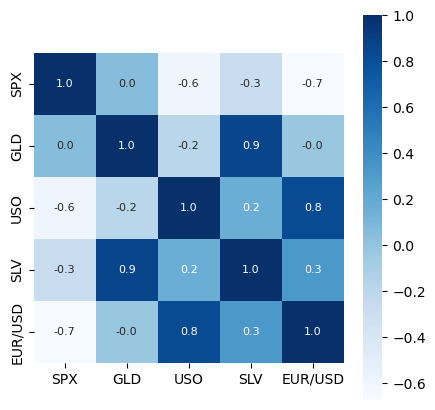

In [22]:
plt.figure(figsize = (5,5))
sns.heatmap(correlation , cbar = True , square = True , fmt = '.1f' , annot = True , cmap  = 'Blues',
            annot_kws = {'size':8})

In [24]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


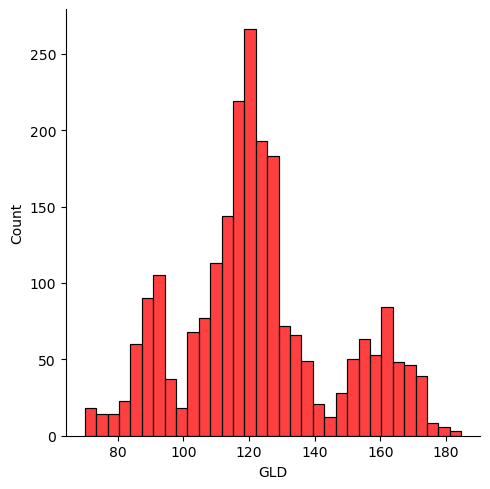

In [26]:
sns.displot(df['GLD'], color='red')

In [27]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

#### split data to training and test sets

In [28]:
x = df.drop(['GLD' ,'Date'],axis = 1)

In [29]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [30]:
y = df['GLD']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

#### Model training

In [56]:
regressor = RandomForestRegressor(n_estimators=100,min_samples_split=2)

In [57]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

#### model evaluation

In [58]:
regressor.score(X_test,y_test)

0.9893320693425096

In [59]:
regressor.score(X_train,y_train)

0.9983712423925621

In [60]:
test_data_predictions = regressor.predict(X_test)

##### r squared to evaluate the model

In [62]:
error = metrics.r2_score(y_test,test_data_predictions)

In [64]:
print('r squared error = ' ,error)

r squared error =  0.9893320693425096


In [68]:
y_test.shape

(458,)

In [69]:
test_data_predictions.shape

(458,)

##### plot to compare between test output and predicted output

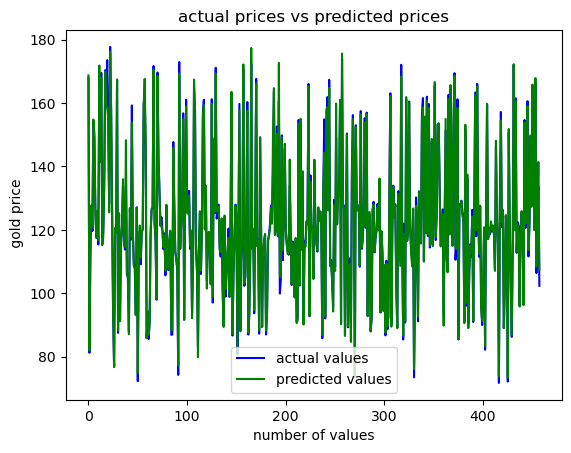

In [84]:
plt.plot(np.asarray(y_test),color ='blue' , label= 'actual values')
plt.plot(test_data_predictions, color='green', label = 'predicted values')
plt.title('actual prices vs predicted prices')
plt.xlabel('number of values')
plt.ylabel(' gold price')
plt.legend()
plt.show()